In [31]:
import os
import glob
import re
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
num_styled  = len(glob.glob("../output/styled_images/*.jpg"))
sample_styled_fnames = np.array(glob.glob("../output/styled_images/*.jpg"))[np.random.randint(0, num_styled-1, 5)]

content_pic_ids = [re.findall(r'([0-9]+)-stylized', fname)[0] for fname in sample_styled_fnames]
style_pic_ids = [re.findall(r'stylized-([0-9]+)', fname)[0] for fname in sample_styled_fnames]

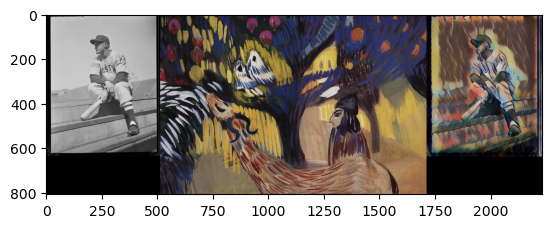

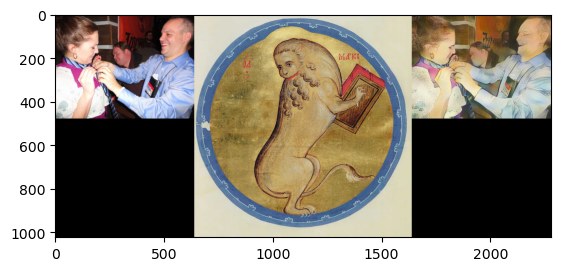

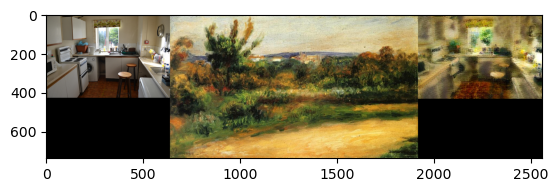

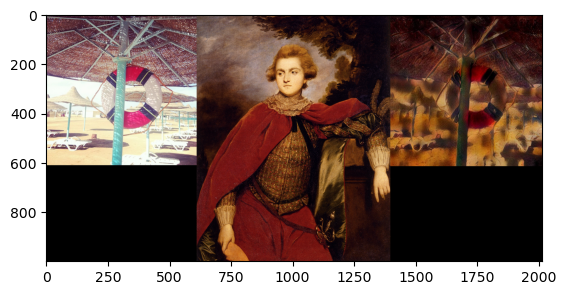

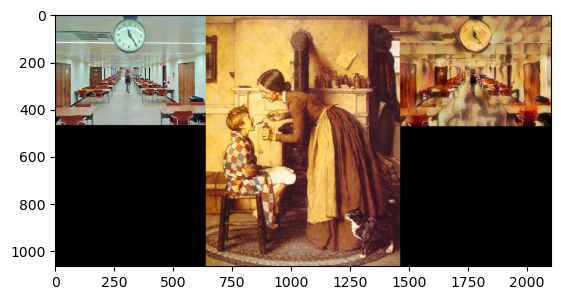

In [40]:
for i in range(len(sample_styled_fnames)):
    styled_fname = sample_styled_fnames[i]
    content_pic_id = content_pic_ids[i]
    style_pic_id = style_pic_ids[i]

    content_img = Image.open(f'../data/content_dir/{content_pic_id}.jpg')
    content_img = np.array(content_img)

    style_img = Image.open(f'../data/style_dir/{style_pic_id}.jpg')
    style_img = np.array(style_img)

    styled_img = Image.open(f'../output/styled_images/{content_pic_id}-stylized-{style_pic_id}.jpg')
    styled_img = np.array(styled_img)
    
    content_h, content_w, _ = content_img.shape
    style_h, style_w, _ = style_img.shape
    styled_h, styled_w, _ = styled_img.shape
    new_height = max(content_h, style_h, styled_h)
    stitch = np.zeros(shape=(new_height, content_w + style_w + styled_w, 3))
    stitch[:content_h, :content_w, :] = content_img[:, :, :3]
    stitch[:style_h, content_w:(content_w+style_w), :] = style_img[:, :, :3]
    stitch[:styled_h, (content_w+style_w):, :] = styled_img[:, :, :3]
    result = Image.fromarray(stitch.astype(np.uint8)).convert('RGB')

    fig, ax = plt.subplots()
    ax.imshow(result)
    fig.savefig(f"compare_images_output/result_{i}.jpg")